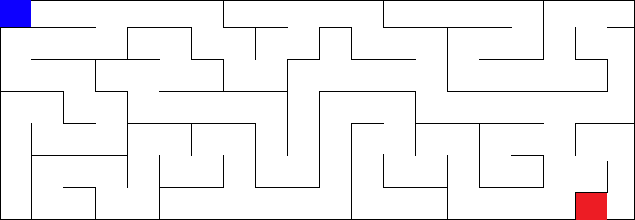

In [2]:
from PIL import Image
import numpy as np
import random
#print image
img=Image.open('maze.png')
img

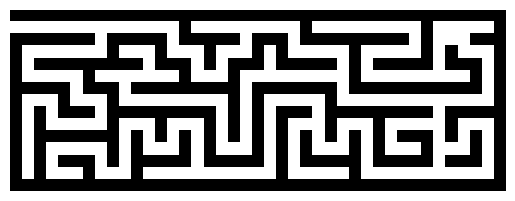

In [3]:
############################Creating the maze matrix - By looking at the image ###################################################

# It has walls and free space. 
# width/length of the square (blue/red) was taken as a step that the rat can move.
# Even though the walls are thin, they were assumed as the same width as the free spaces.
# Columns - Free spaces between the walls+ walls on either side of the free space - 20+21=41
# Rows- 7+8=15
# So the shape of the matrix is = 15 X 41

# Maze representation in 2D- matrix, free spaces by 0 and obstacles by 1
import matplotlib.pyplot as plt
maze=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
               [1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1],
               [1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1],
               [1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,1],
               [1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1],
               [1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1],
               [1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
               [1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1],
               [1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1],
               [1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1],
               [1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1],
               [1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1],
               [1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1],
               [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

# To make sure whether the maze representation is correct, the maze matrix was plotted and it was the same as the image given
               
plt.imshow(maze, cmap='binary', interpolation='none')
plt.axis('off')  # Turn off the axis
plt.show()
               

In [88]:
# Define the start and the destination
start=(1,0) # red square
end=(13,37) # blue square

# directions - right,left,down,up
#(0,1)-right,(1,0)-down,(0,-1)-left,(-1,0)-up
directions=[(0, 1), (1, 0), (0, -1), (-1, 0)]

# get the bounds of the maze
rows, cols = maze.shape

################################### generate random paths from the goal to destination without using any search algorithm. #############################

def generate_random_path(start,max_nodes):
    path=[start] # path is an array of cordinates and initially it contains the starting node
    current=start  # path starts at the starting point

    # To limit the number of nodes in the path and to avoid infinite search loops, maximum number of steps was defined for the loop
    # So that the each path has the maximum of 100 nodes
    

    visited=set() # Keep visited nodes in a set to make sure that the same node is not reached more than once
    visited.add(start)
    
    for _ in range(max_nodes):
        # check all valid directions, before selecting a random direction
        next_nodes=[]
        for direction in directions:
            next_node=(current[0]+direction[0],current[1]+direction[1]) # claculate the cordinates next_node         
            if(is_valid(next_node,visited)):#If the node is not out of bounds of the array and it has not been visited before
                next_nodes.append(next_node)
        if not next_nodes: # if no valid next node is found, break the loop
            break
        # Choose a random valid next node 
        current = random.choice(next_nodes)
        path.append(current) # add the node to path
        visited.add(current)  # add the node to the set of visited nodes
        if(current==end): # if goal reached, end the loop
            break
           
    return path
        
#  Check if the new node traversed to, is not a wall and not a previously visited node:
def is_valid(node,visited):
    x, y = node
    # Check if node is within bounds and is not a wall (maze[x, y] == 0) and hasn't been visited
    return ((0 <= x < rows) and (0 <= y < cols) and (maze[x, y] == 0) and (node not in visited))
            
 ####################################################Generate initial population ##########################################

def generate_initial_population(pop_size,max_nodes):
    population=[]
    for _ in range(pop_size): # generate 100 random paths from start node to destination node 
        path=generate_random_path(start,max_nodes)
        population.append(path)
    return population

############################################### Fitness Function ############################################################
# The factors considered in the fitness function is,
# 1. Whether the goal is reached at the end of the path
# 2. If the goal has not been reached, what is the distance from the last node of the path to the destination/goal node
# 3. length of the path
# The paths with the higher fitness scores are given the priority when selecting parents to crossover
# First, thought of removing the paths which have not reached the goal. But it reduces the diversity of the solutions and after cross over and mutation, 
# they might evolve into better paths. It leads to premature convergence too.
# So decided to keep even the paths which do not reach the gaol and give a remarkable reward for the paths that reach the goal

def calculate_fitness(path):
    fitness=0
    goal_distance=0
    path_length=len(path)
    if(path[-1]==end):
        fitness=1/path_length # If the goal reached, fitness value is the reciprocal of the path length. Smaller the path, higher the fitness
    else:
        end_node=path[-1]
        goal_distance=np.sqrt((end[0]-end_node[0])**2+(end[1]-end_node[1])**2) # manhattan distance from end node to goal
        # If the goal was not eached, fitness value is the reciprocal of the (path length and distance to the goal)
        # Fitness value is affected by the higher path lenghts and higher distance to the goal
        fitness=1/(path_length+goal_distance)  
        
    return fitness

################################# Select Parents #################################################################################
# 1. we have to calculate the probability of the paths to be selected as parents - Roulette Wheel Selection is used 
# 2. Need to calculate the fitness score of each path and then normalize to generate the selection probability of them


def select_parent_path(population,fitness_list):
    total_fitness=fitness_list.sum() # Get the sum of all fitness values
    probability_list=[fval/total_fitness for fval in fitness_list] # normalize the fitness list to get probability list
    # cumulative probability is calculated to create Roulette Wheel
    cumulative_prob_list=np.cumsum(probability_list)

    # Spinning the wheel - To spin the wheel a random float between 0 and 1 is generated as the cumulative probability lies between 0 and 1
    # Each portion of the wheel corresponds to a different individual based on their cumulative probability
    # Individuals are selected in proportion to their fitness values. 
    # The higher the fitness of an individual, the larger their cumulative probability range, and thus, they are more likely to be selected.

    spinning_number=np.random.random() 
    # Select the individual where cumulative probability is greater than the spinning_number
    for i, prob in enumerate(cumulative_prob_list):
        if spinning_number <= prob:
            return population[i]

################################# Crossover #################################################################################


def crossover(parent1, parent2):
   # Two parents are selected using the Roulette Wheel method.
    # The crossover point should not generate any index issues even for the parent with the shorter path
    # So the crossover point was taken as half the length of the shorter path among the parents
    crossover_point = (min(len(parent1), len(parent2))) // 2
    
    parent1_segment1 = parent1[:crossover_point]
    parent1_segment2 = parent1[crossover_point:]
    
    parent2_segment1 = parent2[:crossover_point]
    parent2_segment2 = parent2[crossover_point:]

   # If parent1[:crossover_point] , parent2[crossover_point:] are not adjecent paths, it generates invalid paths as best solution.
    # So checking adjecency
    # If the second segment of the child has visited nodes, it too becomes invalid. So we need to check whether the tail contains visited nodes
    
    # Use a set to track visited nodes in child paths
    visited_child1 = set(parent1_segment1)  #  nodes already visited in child1
    visited_child2 = set(parent2_segment1)  #  nodes already visited in child2

    # Filter out nodes that were already visited in the segments
    child1_segment2 = [node for node in parent2_segment2 if node not in visited_child1]
    child2_segment2 = [node for node in parent1_segment2 if node not in visited_child2]

    # Check adjacency and generate valid paths for child1
    if child1_segment2 and is_adjacent(parent1_segment1[-1], child1_segment2[0]):
        child1 = parent1_segment1 + child1_segment2
    else:
        # Generate a valid adjacent node if not adjacent
        new_node = generate_adjacent_node(parent1_segment1[-1], child1_segment2[0])
        if(new_node==parent1_segment1[-1]):
            child1 = parent1_segment1
        else:
            child1 = parent1_segment1 + [new_node] + child1_segment2
            

    # Check adjacency and generate valid paths for child2
    if child2_segment2 and is_adjacent(parent2_segment1[-1], child2_segment2[0]):
        child2 = parent2_segment1 + child2_segment2
    else:
        # Generate a valid adjacent node if not adjacent
        new_node = generate_adjacent_node(parent2_segment1[-1], child2_segment2[0])
        if(new_node==parent2_segment1[-1]):
            child2 = parent2_segment1 
        else:
            child2 = parent2_segment1 + [new_node] + child2_segment2

    return child1, child2



################################# Mutate #################################################################################
def mutate(path, mutation_rate):
    # Only mutate if a random number is less than the mutation rate
    if np.random.random() < mutation_rate and len(path) > 2:
        # Choose a random mutation point, excluding the start and end nodes
        mutate_at = np.random.randint(1, len(path) - 1)  # Ensure valid index

        # Safely handle the case when the mutation point is near the end of the path
        if mutate_at + 1 < len(path):
            # Generate a valid mutated node adjacent to the node before the mutation point
            mutated_node = generate_adjacent_node(path[mutate_at - 1], path[mutate_at + 1])

            # Ensure the mutated node is not already visited in the path
            if mutated_node not in path:
                # Replace the node at the mutation point with the mutated node
                path = path[:mutate_at] + [mutated_node] + path[mutate_at + 1:]
        else:
            # If the mutation point is at the second to last node, only check adjacency with the node before
            mutated_node = generate_adjacent_node(path[mutate_at - 1], None)
            if mutated_node not in path:
                path = path[:mutate_at] + [mutated_node]

    return path

###################################### Helper FUnctions for adjecent node check ###################################################

def generate_adjacent_node(node1, node2):
    # Generates a node that is adjacent to both node1 and node2
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # Down, Up, Right, Left
    valid_adjacent_nodes = []
    
    for direction in directions:
        adjacent_node = (node1[0] + direction[0], node1[1] + direction[1])
        # Check if this node is adjacent to both node1 and node2
        if is_valid(adjacent_node,set()) and is_adjacent(adjacent_node, node2):
            valid_adjacent_nodes.append(adjacent_node)

    # If valid adjacent nodes are found, return a random one
    if valid_adjacent_nodes:
        return random.choice(valid_adjacent_nodes)

    return node1  # Return the original node if no valid adjacent nodes are found


def is_adjacent(node1, node2):
    # Check if node2 is adjacent to node1
    return (abs(node1[0] - node2[0]) == 1 and node1[1] == node2[1]) or (abs(node1[1] - node2[1]) == 1 and node1[0] == node2[0])


###################################### Helper FUnctions to get the fitness values of the generated paths #####################################

def get_all_fitnesses(population): # Create a numpy array which contains fitness value of each path in the population
    fitness_array=np.zeros(len(population))
    for i in range(len(population)):
        fitness_array[i]=calculate_fitness(population[i])
    return fitness_array


    
################################# Run the Genetic Algorithm to Find the Maze path ##########################################################

def find_best_path(population_size, mutation_rate, max_nodes, generations):
    population = generate_initial_population(population_size, max_nodes)  # Generate initial list of paths
    best_solution = [-1, 0, np.array([])]

    for i in range(generations):
        fitness_values = get_all_fitnesses(population)  # Get fitness values for all paths
        goal_reached_paths = [path for path in population if path[-1] == end]  # Paths that reached the goal
        goal_reached=False
        
        if goal_reached_paths:  # If there are paths that reached the goal
            goal_reached=True
            best_path = min(goal_reached_paths, key=len)  # Best path is the one with minimum length
            print(f"At generation {i}, found a path to the goal: {best_path}")  # Print the path
            
        else:
            goal_reached=False
            best_path = population[np.argmax(fitness_values)]  # Best path by fitness if goal not reached
            print(f"At generation {i}, no path reached the goal: {best_path}")  # Print the path

        # Saving the best solution
        if (fitness_values.max() > best_solution[1] and goal_reached):
            best_solution[0] = i
            best_solution[1] = fitness_values.max()
            best_solution[2] = best_path
            
        new_population = []

        # Keep the best path from the current generation.
        new_population.append(best_path)
        
        # Create new generation through selection, crossover, and mutation
        for _ in range((population_size - 1) // 2):  # -1 because the best path is already added
            parent1 = select_parent_path(population, fitness_values)
            parent2 = select_parent_path(population, fitness_values)
            
            # Perform crossover to produce two children
            child1, child2 = crossover(parent1, parent2)
            
            # Mutate the children
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))
        
        # If population size is odd, mutate the best path slightly to maintain diversity
        if population_size % 2 != 0:
            mutated_best_path = mutate(best_path, mutation_rate * 0.1)  # Small mutation
            new_population.append(mutated_best_path)
        
        population = new_population  # Update population to the new generation

    return best_solution[0], best_solution[1], best_solution[2]


In [89]:
find_best_path(200,0.3,100,500)

At generation 0, found a path to the goal: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (2, 13), (3, 13), (3, 14), (3, 15), (4, 15), (5, 15), (5, 16), (5, 17), (4, 17), (3, 17), (3, 18), (3, 19), (2, 19), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (2, 23), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (4, 27), (5, 27), (6, 27), (7, 27), (7, 28), (7, 29), (7, 30), (7, 31), (7, 32), (7, 33), (7, 34), (7, 35), (8, 35), (9, 35), (10, 35), (11, 35), (12, 35), (13, 35), (13, 36), (13, 37)]
At generation 1, found a path to the goal: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (2, 13), (3, 13), (3, 14), (3, 15), (4, 15), (5, 15), (5, 16), (5, 17), (4, 17), (3, 17), (3, 18), (3, 19), (2, 19), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (2, 23), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (4, 27), (5, 27), (6, 27), (7, 27), (7, 28), (7, 29), (7, 30),

(2,
 0.024713879738472985,
 [(1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10),
  (1, 11),
  (1, 12),
  (1, 13),
  (2, 13),
  (3, 13),
  (3, 14),
  (3, 15),
  (4, 15),
  (5, 15),
  (5, 16),
  (5, 17),
  (4, 17),
  (3, 17),
  (3, 18),
  (3, 19),
  (2, 19),
  (1, 19),
  (1, 20),
  (1, 21),
  (1, 22),
  (1, 23),
  (2, 23),
  (3, 23),
  (3, 24),
  (3, 25),
  (3, 26),
  (3, 27),
  (4, 27),
  (5, 27),
  (6, 27),
  (7, 27),
  (7, 28),
  (7, 29),
  (7, 30),
  (7, 31),
  (7, 32),
  (7, 33),
  (7, 34),
  (7, 35),
  (8, 35),
  (9, 35),
  (10, 35),
  (11, 35),
  (12, 35),
  (13, 35),
  (13, 36),
  (13, 37)])